<a href="https://colab.research.google.com/github/jyck613/Gemini_API_Cookbook/blob/main/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

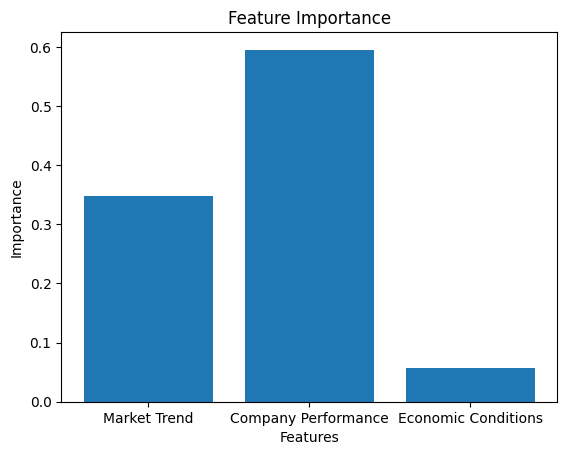

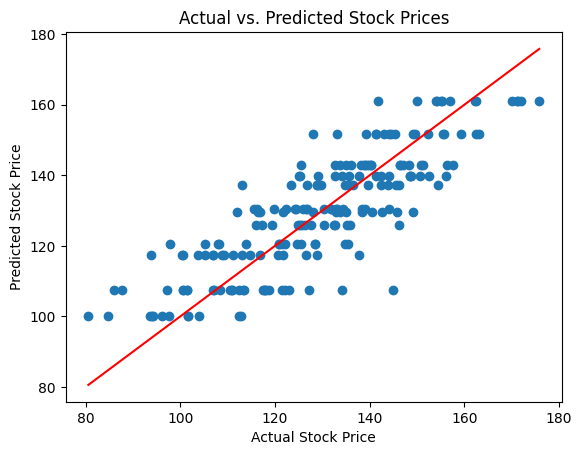

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 0) Synthetic Data Generation (Financial Industry Example)
# ---
# This example simulates stock prices influenced by:
# - Market Trend (uptrend, downtrend)
# - Company Performance (good, average, poor)
# - Economic Conditions (recession, expansion)

# Define possible values for categorical features
market_trend = ['uptrend', 'downtrend']
company_performance = ['good', 'average', 'poor']
economic_conditions = ['recession', 'expansion']

# Create a DataFrame with random values
np.random.seed(42)  # For reproducibility
data_size = 1000
data = pd.DataFrame({
    'Market Trend': np.random.choice(market_trend, data_size),
    'Company Performance': np.random.choice(company_performance, data_size),
    'Economic Conditions': np.random.choice(economic_conditions, data_size)
})

# Define a function to map categorical features to numerical values
def map_categories(df):
    df = df.copy()
    df['Market Trend'] = df['Market Trend'].map({'uptrend': 1, 'downtrend': 0})
    df['Company Performance'] = df['Company Performance'].map({'good': 2, 'average': 1, 'poor': 0})
    df['Economic Conditions'] = df['Economic Conditions'].map({'expansion': 1, 'recession': 0})
    return df

data = map_categories(data)

# Simulate stock prices based on the factors
data['Stock Price'] = (
    100 +
    20 * data['Market Trend'] +
    15 * data['Company Performance'] +
    10 * data['Economic Conditions'] +
    np.random.normal(0, 10, data_size)  # Add noise
)

# 1) Machine Learning Points
# ---
# Split data into features (X) and target variable (y)
X = data[['Market Trend', 'Company Performance', 'Economic Conditions']]
y = data['Stock Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# 2) Pros and Cons
# ---
# Pros:
# - High accuracy: Often achieves state-of-the-art performance in many machine learning tasks.
# - Handles complex relationships: Can capture non-linear and complex interactions between features.
# - Feature importance: Provides insights into the relative importance of different features.
# - Robust to overfitting: Less prone to overfitting compared to decision trees alone.

# Cons:
# - Sensitive to hyperparameters: Requires careful tuning of hyperparameters (e.g., learning rate, number of trees) for optimal performance.
# - Computationally expensive: Can be computationally expensive to train, especially with large datasets.
# - Less interpretable than simpler models: The final model can be complex and difficult to interpret.

# 3) Visualization
# ---
# Feature Importance
feature_importance = model.feature_importances_
plt.bar(X.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# Actual vs. Predicted Stock Prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Stock Price')
plt.ylabel('Predicted Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()